# Benford's Law on Covid-19 Data

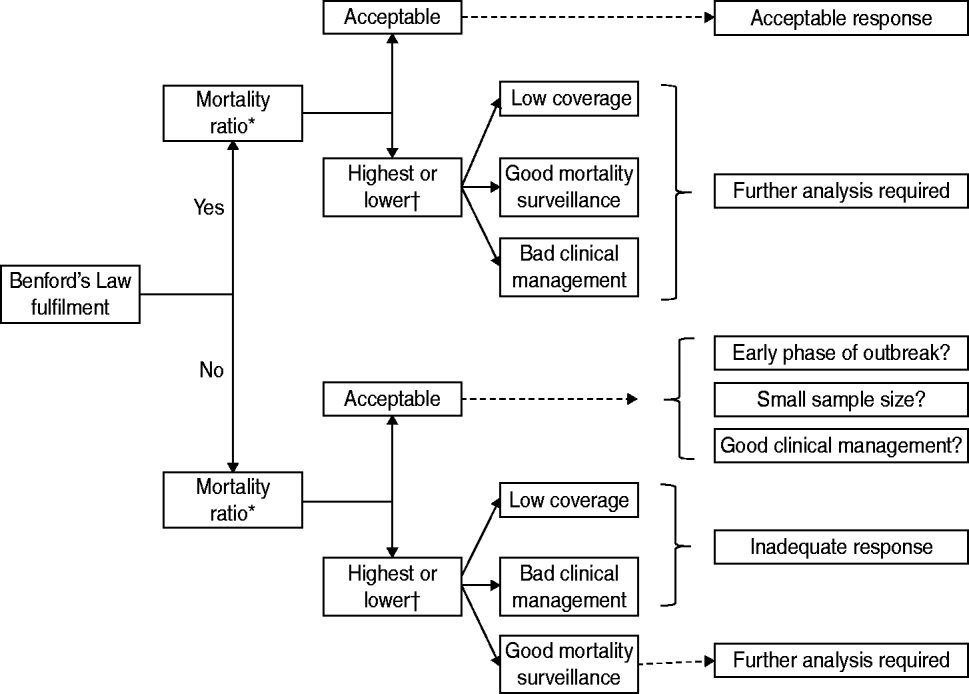

\* In relation to mean mortality in all countries. † Outliers are potential irregular data.

Idrovo, A. J., Fernández-Niño, J. A., Bojórquez-Chapela, I., & Moreno-Montoya, J. (2011). Performance of public health surveillance systems during the influenza A (H1N1) pandemic in the Americas: testing a new method based on Benford's Law. Epidemiology & Infection, 139(12), 1827-1834.

In [1]:
import wget

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
filename = wget.download(url,out='data')
filename

100% [..............................................................................] 76463 / 76463

'data/time_series_19-covid-Confirmed.csv'

In [2]:
import pandas as pd, numpy as np

df = pd.read_csv(filename)
df

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN        Thailand  15.0000  101.0000        2        3   
1              NaN           Japan  36.0000  138.0000        2        1   
2              NaN       Singapore   1.2833  103.8333        0        1   
3              NaN           Nepal  28.1667   84.2500        0        0   
4              NaN        Malaysia   2.5000  112.5000        0        0   
..             ...             ...      ...       ...      ...      ...   
463        Bermuda  United Kingdom  32.3078  -64.7505        0        0   
464            NaN            Chad  15.4542   18.7322        0        0   
465            NaN     El Salvador  13.7942  -88.8965        0        0   
466            NaN            Fiji -17.7134  178.0650        0        0   
467            NaN       Nicaragua  12.8654  -85.2072        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/10/20  3/11/20  3/12/20  \
0          5        7        8        8  ...       53       59       70   
1          2        2        4        4  ...      581      639      639   
2          3        3        4        5  ...      160      178      178   
3          0        1        1        1  ...        1        1        1   
4          0        3        4        4  ...      129      149      149   
..       ...      ...      ...      ...  ...      ...      ...      ...   
463        0        0        0        0  ...        0        0        0   
464        0        0        0        0  ...        0        0        0   
465        0        0        0        0  ...        0        0        0   
466        0        0        0        0  ...        0        0        0   
467        0        0        0        0  ...        0        0        0   

     3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  
0         75       82      114      147      177      212      272  
1        701      773      839      825      878      889      924  
2        200      212      226      243      266      313      345  
3          1        1        1        1        1        1        1  
4        197      238      428      566      673      790      900  
..       ...      ...      ...      ...      ...      ...      ...  
463        0        0        0        0        0        0        2  
464        0        0        0        0        0        0        1  
465        0        0        0        0        0        0        1  
466        0        0        0        0        0        0        1  
467        0        0        0        0        0        0        1  

[468 rows x 62 columns]

In [3]:
df = df.drop(['Province/State','Lat','Long'], axis=1)
df = df.groupby('Country/Region').sum()
df = df.sort_values(df.columns[-1],ascending=False)
df = df.applymap(lambda x: int(str(x)[0]))
df

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
China                 5        6        9        1        2        2        5   
Italy                 0        0        0        0        0        0        0   
Iran                  0        0        0        0        0        0        0   
Spain                 0        0        0        0        0        0        0   
Germany               0        0        0        0        0        1        4   
...                 ...      ...      ...      ...      ...      ...      ...   
El Salvador           0        0        0        0        0        0        0   
Somalia               0        0        0        0        0        0        0   
Gambia, The           0        0        0        0        0        0        0   
Eswatini              0        0        0        0        0        0        0   
Chad                  0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  3/10/20  3/11/20  3/12/20  \
Country/Region                             ...                              
China                 6        8        9  ...        8        8        8   
Italy                 0        0        2  ...        1        1        1   
Iran                  0        0        0  ...        8        9        1   
Spain                 0        0        0  ...        1        2        2   
Germany               4        4        5  ...        1        1        2   
...                 ...      ...      ...  ...      ...      ...      ...   
El Salvador           0        0        0  ...        0        0        0   
Somalia               0        0        0  ...        0        0        0   
Gambia, The           0        0        0  ...        0        0        0   
Eswatini              0        0        0  ...        0        0        0   
Chad                  0        0        0  ...        0        0        0   

                3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  
Country/Region                                                                 
China                 8        8        8        8        8        8        8  
Italy                 1        2        2        2        3        3        4  
Iran                  1        1        1        1        1        1        1  
Spain                 5        6        7        9        1        1        1  
Germany               3        4        5        7        9        1        1  
...                 ...      ...      ...      ...      ...      ...      ...  
El Salvador           0        0        0        0        0        0        1  
Somalia               0        0        0        1        1        1        1  
Gambia, The           0        0        0        0        1        1        1  
Eswatini              0        1        1        1        1        1        1  
Chad                  0        0        0        0        0        0        1  

[155 rows x 58 columns]

In [4]:
N = 20
freq = pd.DataFrame(index=df.index)[:N]
for i in range(1,10):
    freq[str(i)] = (df.values[:N]==i).sum(1)
freq.insert(0,'Days',freq.sum(axis=1))

benford = np.log10(1+1/np.arange(1,10,dtype='float'))
observed = freq.values[:,1:]
expected = freq['Days'].values[:,None]*np.tile(benford,(freq.shape[0],1))
chi2 = np.sum(np.square(observed-expected)/expected,axis=1)
freq['Pearson Chi2'] = chi2

freq

Days   1   2   3  4   5  6   7   8   9  Pearson Chi2
Country/Region                                                      
China             58   4   4   4  3   3  4  15  19   2    144.451659
Italy             49   7  14  19  3   1  2   1   1   1     40.574391
Iran              30  11   5   2  2   3  2   1   1   3      4.137024
Spain             48  17  20   1  2   2  3   1   1   1     25.426367
Germany           53  34   3   1  7   2  1   3   1   1     35.055440
US                58  28   6   1  2  11  3   3   2   2     25.474035
France            56  26   5   6  3   4  9   1   0   2     20.522347
Korea, South      58  11  15   6  6   2  3   7   7   1     16.982597
Switzerland       24   6   6   3  3   1  2   0   2   1      3.556828
United Kingdom    49  10  13   6  3   1  0   0   4  12     56.007722
Netherlands       22   9   4   3  0   2  1   0   2   1      5.158162
Austria           24   8   6   3  1   2  1   1   1   1      1.979115
Belgium           45  33   5   2  0   2  1   0   2   0     42.449311
Norway            23  13   2   1  1   2  1   1   1   1      8.588951
Sweden            49  36   4   2  0   2  0   2   1   2     45.990925
Denmark           22   7   3   2  3   0  2   0   3   2      8.085474
Japan             58   9  22   2  6   4  3   5   5   2     24.153356
Malaysia          55  16  18   2  4   3  1   2   6   3     17.464150
Canada            54  11   7   3  8   3  2  12   5   3     34.048131
Portugal          18   3   4   3  3   3  0   1   1   0      6.228929

<IPython.core.display.Javascript object>


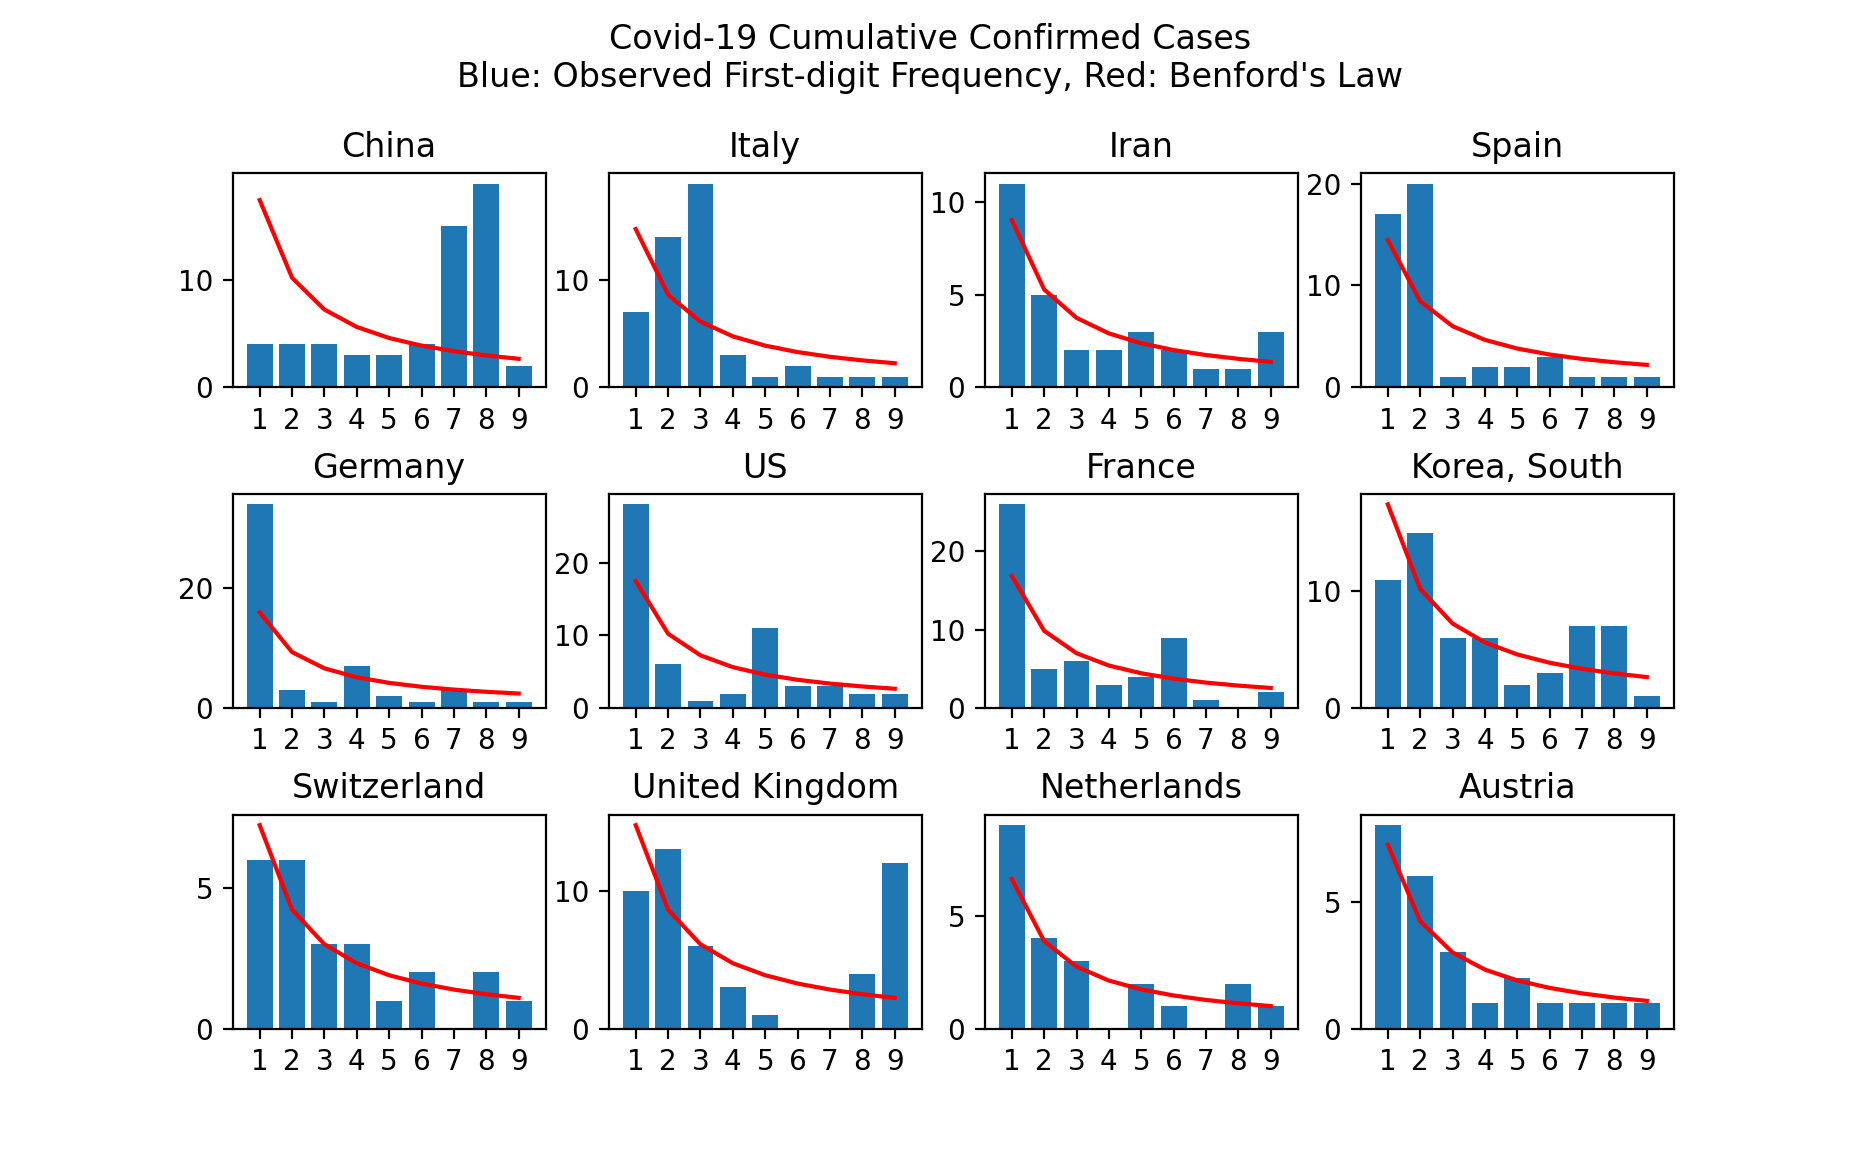

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.bar(range(1,10), height=observed[i,:])
    plt.plot(range(1,10), expected[i,:], 'r')
    ax.set_xticks(range(1,10))
    ax.set_title(freq.index[i])
plt.suptitle('Covid-19 Cumulative Confirmed Cases\nBlue: Observed First-digit Frequency, Red: Benford\'s Law')
plt.subplots_adjust(hspace=0.5,top=0.85)

In [6]:
from datetime import datetime
datetime.now()

datetime.datetime(2020, 3, 20, 1, 7, 16, 415572)